In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def plot(x, y, x_label=None, y_label=None, title=None, name_save_file=None, points=None):
    if title:
        plt.title(title)
    if x_label:
        plt.xlabel(x_label)
    if y_label:
        plt.ylabel(y_label)
    if points:
        for point in points:
            plt.scatter(*point)
    plt.plot(x, y)
    if name_save_file:
        plt.savefig(name_save_file)
    plt.grid()
    plt.show()
    
def calc_mutual_inductance(coil_1, coil_2, d, po=0, fi=0):
    """Расчёт взаимной индуктивности между двумя витками.
    :param coil_1: список с радиусом одной катушки индуктивности
    :type coil_1: list
    :param coil_2: список с радиусом одной катушки индуктивности
    :type coil_1: list
    :param d: расстояние между витками
    :type d: float
    :rtype: float
    :return: M, собственная индуктивность между витками
    """
    coil_1 = coil_1.T
    mu0 = 1.26 * 10 ** (-6)
    M = 0
    N = 180
    K = 180
    df1 = 2 * np.pi / N
    df2 = 2 * np.pi / K
    for n in range(N):
        for k in range(K):
            xk_xn = po + coil_1 * np.cos(df2 * k) * np.cos(fi) - coil_2 * np.cos(df1 * n)
            yk_yn = coil_1 * np.sin(df2 * k) * np.cos(fi) - coil_2 * np.sin(df1 * n)
            zk_zn = d + coil_1 * np.cos(df2 * k) * np.sin(fi)
            r12 = (xk_xn ** 2 + yk_yn ** 2 + zk_zn ** 2) ** 0.5
            M += (np.cos(df2 * k - df1 * n) * df1 * df2) / r12
    M *= mu0 * coil_1 * coil_2 / (4 * np.pi)
    return M

Experiment from article: MAXIMUM OF MUTUAL INDUCTANCE BY INDUCTIVE LINK

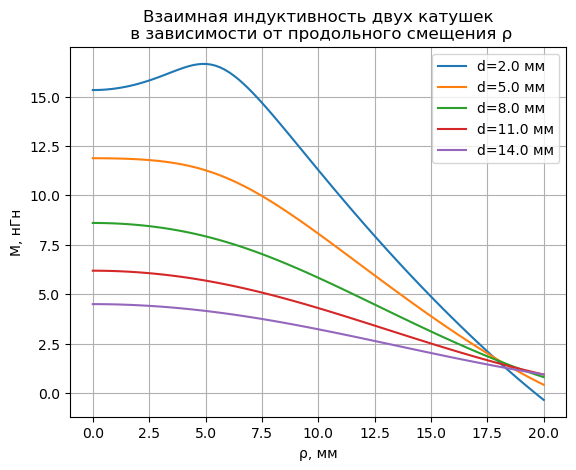

In [41]:
coil_1 = np.array([[[0.015]]])
coil_2 = np.array([[[0.01]]])
x = np.linspace(0, 0.02, 100)

d1 = 0.002
d2 = 0.005
d3 = 0.008
d4 = 0.011
d5 = 0.014

plt.title("Взаимная индуктивность двух катушек\n в зависимости от продольного смещения ρ")
plt.plot(1000*x, calc_mutual_inductance(coil_1, coil_2, d=d1, po=x)[0][0] * (10 ** 9), label=f"d={d1 * 1000} мм")
plt.plot(1000*x, calc_mutual_inductance(coil_1, coil_2, d=d2, po=x)[0][0] * (10 ** 9), label=f"d={d2 * 1000} мм")
plt.plot(1000*x, calc_mutual_inductance(coil_1, coil_2, d=d3, po=x)[0][0] * (10 ** 9), label=f"d={d3 * 1000} мм")
plt.plot(1000*x, calc_mutual_inductance(coil_1, coil_2, d=d4, po=x)[0][0] * (10 ** 9), label=f"d={d4 * 1000} мм")
plt.plot(1000*x, calc_mutual_inductance(coil_1, coil_2, d=d5, po=x)[0][0] * (10 ** 9), label=f"d={d5 * 1000} мм")
plt.xlabel("ρ, мм")
plt.ylabel("М, нГн")
plt.grid()
plt.legend()
plt.show()